In [1]:
# Data manipulation libraries
import pandas as pd
import numpy as np

##### Scikit Learn modules needed for Logistic Regression
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder,MinMaxScaler , StandardScaler

# Plotting libraries
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes = True)
%matplotlib inline

In [2]:
# Load data
df = pd.read_csv('./data/winequality-red.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
# Preprocessing of data
# Creating 3 classes based on quality <= 4 , low; quality > 4 <= 8, medium else high
def create_level(x):
    # function to create levels basis wine quality
    if x <= 5:
        x = "low"
    elif x > 5 and x < 7:
        x = "medium"
    else:
        x = "high"
    return x

In [4]:
df['level'] = df['quality'].apply(lambda x: create_level(x))

In [5]:
print(df.quality.describe())
print(df.level.value_counts())

count    1599.000000
mean        5.636023
std         0.807569
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         8.000000
Name: quality, dtype: float64
low       744
medium    638
high      217
Name: level, dtype: int64


In [6]:
# Encoding of categorical class variable to integers which will be used for feeding the model
le = LabelEncoder()
le_encoded = le.fit_transform(df['level'])
#le_encoded = le.transform(le)
print((le.classes_))
print(le_encoded)

['high' 'low' 'medium']
[1 1 1 ... 2 1 2]


In [7]:
# Train & Test split
x_train, x_test, y_train, y_test = train_test_split(df.iloc[:,:10],le_encoded,test_size=0.20,
                                                    random_state=21)

print('Shape of Training Xs:{}'.format(x_train.shape))
print('Shape of Test Xs:{}'.format(x_test.shape))
print('Shape of Training y:{}'.format(y_train.shape))
print('Shape of Test y:{}'.format(y_test.shape))

Shape of Training Xs:(1279, 10)
Shape of Test Xs:(320, 10)
Shape of Training y:(1279,)
Shape of Test y:(320,)


In [8]:
# Build Model
clf = SGDClassifier(eta0=0.001, learning_rate= "optimal",random_state=0)
clf.fit(x_train, y_train)
y_predicted = clf.predict(x_test)
score=clf.score(x_test,y_test);#testing the linear regression model

In [9]:
# Model diagnostic
print(score)
print(y_predicted)

0.4125
[2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [10]:
# Prediction on Test Data
y_predicted_labels = le.inverse_transform(y_predicted)
y_predicted_labels[0:10]

array(['medium', 'medium', 'medium', 'medium', 'medium', 'medium',
       'medium', 'medium', 'medium', 'medium'], dtype=object)

In [11]:
true_labels = le.inverse_transform(y_test)
true_labels[0:10]

array(['medium', 'medium', 'low', 'medium', 'medium', 'high', 'low',
       'low', 'low', 'low'], dtype=object)

### 8. Confusion Matrix

In [12]:
#Confusion Matrix
# Compute confusion matrix
cnf_matrix = confusion_matrix(true_labels, y_predicted_labels)
np.set_printoptions(precision=2)
cnf_matrix

array([[  1,   0,  44],
       [  1,   0, 143],
       [  0,   0, 131]])

In [13]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

Confusion matrix, without normalization
[[  1   0  44]
 [  1   0 143]
 [  0   0 131]]
Normalized confusion matrix
[[0.02 0.   0.98]
 [0.01 0.   0.99]
 [0.   0.   1.  ]]


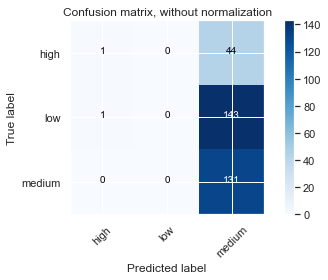

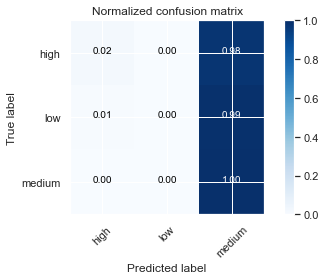

In [14]:
#With Normalization
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=le.classes_,
                      title='Confusion matrix, without normalization')
# With normalization
plt.figure()
plot_confusion_matrix(cnf_matrix, classes= le.classes_, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [15]:
from sklearn.preprocessing import StandardScaler
stdscalar = StandardScaler()
X_stdscalar = stdscalar.fit_transform(df.iloc[:,:10])
X_stdscalar

array([[-0.53,  0.96, -1.39, ...,  0.56,  1.29, -0.58],
       [-0.3 ,  1.97, -1.39, ...,  0.03, -0.72,  0.13],
       [-0.3 ,  1.3 , -1.19, ...,  0.13, -0.33, -0.05],
       ...,
       [-1.16, -0.1 , -0.72, ..., -0.53,  0.71,  0.54],
       [-1.39,  0.65, -0.78, ..., -0.68,  1.68,  0.31],
       [-1.33, -1.22,  1.02, ..., -0.67,  0.51,  0.01]])

In [16]:
# Train & Test split
x_train, x_test, y_train, y_test = train_test_split(X_stdscalar,le_encoded,test_size=0.20,
                                                    random_state=21)

print('Shape of Training Xs:{}'.format(x_train.shape))
print('Shape of Test Xs:{}'.format(x_test.shape))
print('Shape of Training y:{}'.format(y_train.shape))
print('Shape of Test y:{}'.format(y_test.shape))

Shape of Training Xs:(1279, 10)
Shape of Test Xs:(320, 10)
Shape of Training y:(1279,)
Shape of Test y:(320,)


In [32]:
# Build Model
clf = SGDClassifier(eta0=0.00001, learning_rate= "constant",random_state= 120, max_iter=10000)
clf.fit(x_train, y_train)
y_predicted = clf.predict(x_test)
score=clf.score(x_test,y_test);#testing the linear regression model

In [33]:
# Model diagnostic
print(score)
print(y_predicted)

0.525
[1 2 1 1 1 1 1 1 1 1 2 1 1 2 1 1 2 1 1 1 1 2 2 1 1 1 2 2 1 1 1 1 2 1 2 2 2
 2 1 2 1 2 2 2 1 1 1 1 1 1 1 2 2 2 1 2 2 1 2 2 1 1 1 1 1 1 1 2 1 2 1 1 1 2
 1 2 2 1 1 1 2 2 2 1 2 2 2 1 1 2 2 2 1 1 1 1 2 1 1 2 2 1 2 1 2 1 2 1 2 1 1
 1 2 2 1 1 2 1 1 1 2 2 2 2 2 1 1 1 1 1 1 2 1 1 2 1 1 1 2 1 2 1 2 2 1 2 1 2
 1 2 1 1 1 2 1 1 2 2 2 1 1 1 2 1 2 2 2 2 1 1 1 1 2 2 2 2 1 1 1 1 1 2 2 2 2
 1 1 1 1 2 1 2 1 1 2 2 1 1 1 1 2 1 1 2 2 1 1 2 1 1 1 1 1 1 1 1 1 1 1 2 2 2
 2 2 1 1 1 1 2 2 2 1 1 1 1 2 1 1 2 1 1 1 2 1 2 2 2 1 2 1 1 1 1 1 1 1 2 1 1
 2 2 2 1 1 1 2 2 1 2 1 2 1 1 1 1 1 1 1 2 1 1 2 2 2 1 1 2 1 1 1 1 1 1 1 2 2
 1 2 2 1 2 1 1 2 1 1 1 1 2 1 1 1 2 2 1 1 1 2 1 1]


In [19]:
# Prediction on Test Data
y_predicted_labels = le.inverse_transform(y_predicted)
y_predicted_labels[0:10]

array(['medium', 'medium', 'low', 'low', 'high', 'medium', 'low', 'low',
       'low', 'low'], dtype=object)

In [20]:
true_labels = le.inverse_transform(y_test)
true_labels[0:10]

array(['medium', 'medium', 'low', 'medium', 'medium', 'high', 'low',
       'low', 'low', 'low'], dtype=object)

### 8. Confusion Matrix

In [21]:
#Confusion Matrix
# Compute confusion matrix
cnf_matrix = confusion_matrix(true_labels, y_predicted_labels)
np.set_printoptions(precision=2)
cnf_matrix

array([[ 21,   7,  17],
       [  6, 120,  18],
       [ 23,  56,  52]])

In [22]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

Confusion matrix, without normalization
[[ 21   7  17]
 [  6 120  18]
 [ 23  56  52]]
Normalized confusion matrix
[[0.47 0.16 0.38]
 [0.04 0.83 0.12]
 [0.18 0.43 0.4 ]]


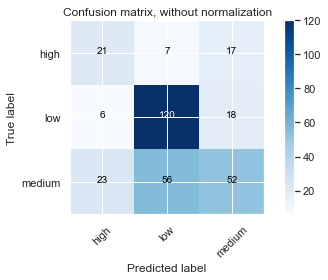

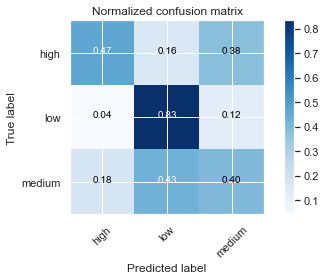

In [23]:
#With Normalization
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=le.classes_,
                      title='Confusion matrix, without normalization')
# With normalization
plt.figure()
plot_confusion_matrix(cnf_matrix, classes= le.classes_, normalize=True,
                      title='Normalized confusion matrix')

plt.show()